# Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read data

In [3]:
df = pd.read_csv("DS/wells_info_with_prod.csv")

In [4]:
display(df.head(5))

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,Prod1Year,ProdAll
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004,126898,201325
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321,22616,34625
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841,47523,69009
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020,59474,81048
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414,14427,18050


## Separate data

In [5]:
X = df.drop(['Prod1Year', 'API', 'ProdAll'], axis = 1)

In [6]:
Y = df['Prod1Year']

In [7]:
X.shape

(50, 16)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PermitDate            50 non-null     object 
 1   SpudDate              50 non-null     object 
 2   CompletionDate        50 non-null     object 
 3   FirstProductionDate   50 non-null     object 
 4   operatorNameIHS       50 non-null     object 
 5   formation             50 non-null     object 
 6   BasinName             50 non-null     object 
 7   StateName             50 non-null     object 
 8   CountyName            50 non-null     object 
 9   LatWGS84              50 non-null     float64
 10  LonWGS84              50 non-null     float64
 11  BottomHoleLatitude    50 non-null     float64
 12  BottomHoleLongitude   50 non-null     float64
 13  LATERAL_LENGTH_BLEND  50 non-null     float64
 14  PROP_PER_FOOT         50 non-null     float64
 15  WATER_PER_FOOT        50 

In [9]:
date_cols = ['CompletionDate', 'PermitDate', 'SpudDate']

In [10]:
display(X[date_cols].head(5))

,CompletionDate,PermitDate,SpudDate
0,2014-12-02,2014-05-06,2014-05-06
1,2014-02-26,2013-07-21,2013-10-06
2,2014-09-07,2013-09-08,2013-09-25
3,2015-03-31,2013-09-11,2014-12-05
4,2014-04-23,2014-01-07,2014-01-13


In [11]:
def sep_date(df, col, new_col_name = None):
    
    if(new_col_name is None):
        new_col_name = col[:-4]
    
    df[new_col_name + "Year"] = df[col].apply(lambda x: x[:4])
    df[new_col_name + "Month"] = df[col].apply(lambda x: x[5:7])
    df[new_col_name + "Day"] = df[col].apply(lambda x: x[8:])
                                               

In [12]:
for d in date_cols:
    sep_date(X, d)
X = X.drop(date_cols, axis = 1)

In [13]:
num_cols = [i for i in X.columns if X[i].dtype != object]
cat_cols = list(set(X.columns) - set(num_cols))

In [14]:
display(X[['SpudYear', 'SpudMonth', 'SpudDay']].head(5))

,SpudYear,SpudMonth,SpudDay
0,2014,05,06
1,2013,10,06
2,2013,09,25
3,2014,12,05
4,2014,01,13


In [15]:
num_cols

['LatWGS84',
 'LonWGS84',
 'BottomHoleLatitude',
 'BottomHoleLongitude',
 'LATERAL_LENGTH_BLEND',
 'PROP_PER_FOOT',
 'WATER_PER_FOOT']

In [16]:
cat_cols

['formation',
 'BasinName',
 'PermitYear',
 'CompletionYear',
 'SpudDay',
 'CompletionMonth',
 'SpudYear',
 'PermitMonth',
 'PermitDay',
 'SpudMonth',
 'operatorNameIHS',
 'StateName',
 'CompletionDay',
 'CountyName',
 'FirstProductionDate']

## Visualisation 

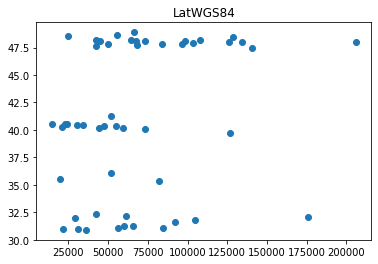

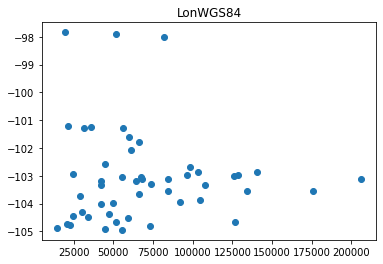

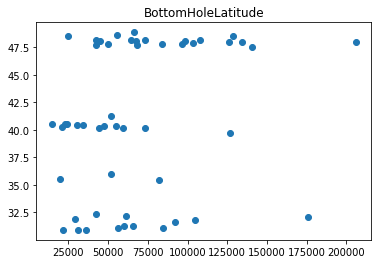

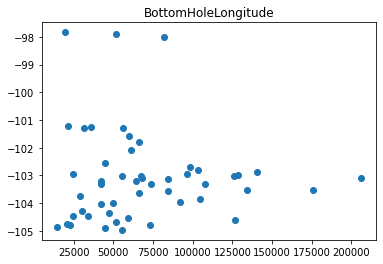

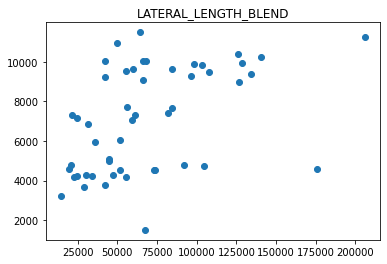

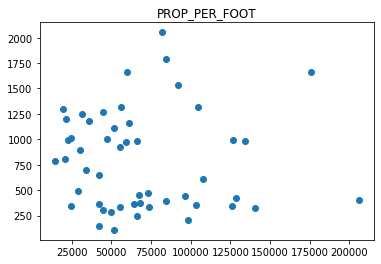

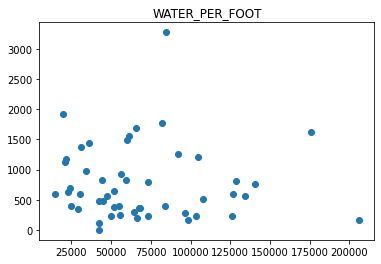

In [23]:
for col in num_cols:
    plt.scatter(Y, X[col])
    plt.title(col)
    plt.show()

Выглядит так, будто 

## Split

In [17]:
x_train, x_test, y_train , y_test = train_test_split(X,Y, test_size = 0.3)

## Scale

In [18]:
std_scaler = StandardScaler()

In [19]:
x_train[num_cols] = std_scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = std_scaler.transform(x_test[num_cols])

In [20]:
y_scaler = y_train.mean()

In [21]:
y_train = y_train/y_scaler
y_test = y_test/y_scaler